# Projeto Big Data - Bolsa Familia

Este notebook tem como intuito **realizar calculos** e **gerar graficos** de acordo com os dados fornecidos pelo dataset `BolsaFamilia_2017.xlsx`

#### Nesta primeira etapa, estamos basicamente inicializando o projeto, importando todas as bibliotecas necessárias, e declarando todas as nossas variaveis globais, as quais iremos utilizar durante a execução da analise.

In [1]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt

# Armazenando o dataset, e o transformando automaticamente em um DataFrame
df = pd.read_excel('BolsaFamilia_2017.xlsx')

# Variaveis Globais
estados = df['Estado'].unique()
last_estado = ''
percent_estados = {}
df_estados = {
    'Estado': [],
    'Valor Recebido': [],
    'Valor de Sobra': [],
    'Percentual de Sobra': []
}

#### Nesta segunda etapa, estamos coletando e agrupando os dados de acordo com a analise que iremos fazer.

In [2]:
# Para cada estado registrado no dataset...
for estado in estados:

    # Armazena a soma do valor total de cada municipio do estado atual
    total_pago = df.loc[df['Estado'] == estado, 'TotalPago'].sum()

    # Armazena a soma do valor que sobrou entre cada municipio do estado atual
    total_sobra = df.loc[df['Estado'] == estado, 'SaldoDeSobra'].sum()

    # Calculamos o percentual do valor de sobra com o valor total recebido pelo estado atual
    percent_sobra = round((total_sobra * 100) / total_pago, 2)

    # Se o percentual de sobra do estado atual for maior-igual a 5%...
    if percent_sobra >= 5:

        # Armazena o percentual calculado com seu respectivo estado
        percent_estados[estado] = percent_sobra

        # Armazena todos os dados relevantes sobre o estado atual
        df_estados['Estado'].append(estado)
        df_estados['Valor Recebido'].append("R$ {:20,.0f}".format(total_pago))
        df_estados['Valor de Sobra'].append("R$ {:20,.0f}".format(total_sobra))
        df_estados['Percentual de Sobra'].append(str(percent_sobra)+"%")

# Organizando o dicionario de percentual de estados em ordem decrescente
percent_estados = dict(
    sorted(
        percent_estados.items(),
        key=lambda x:x[1],
        reverse=True
    )
)

# Cria um DataDrame a partir dos estados que ultrapassaram os 5% de sobra
df_estados = pd.DataFrame(data=df_estados)

#### Nesta terceira, e ultima etapa, iremos utilizar os dados coletados da etapa anterior para criar graficos e planilhas.

,Estado,Valor Recebido,Valor de Sobra,Percentual de Sobra
10,Rondônia,"R$ 154,803,120","R$ 12,373,225",7.99%
5,Santa Catarina,"R$ 228,290,118","R$ 17,557,575",7.69%
2,São Paulo,"R$ 2,806,387,560","R$ 207,027,885",7.38%
0,Espírito Santo,"R$ 323,442,734","R$ 23,330,961",7.21%
4,Paraná,"R$ 654,542,533","R$ 45,792,993",7.0%
6,Mato Grosso,"R$ 307,513,747","R$ 21,411,873",6.96%
3,Rio Grande do Sul,"R$ 695,069,373","R$ 46,393,302",6.67%
7,Mato Grosso do Sul,"R$ 256,968,630","R$ 16,919,505",6.58%
8,Distrito Federal,"R$ 151,730,592","R$ 9,919,147",6.54%
11,Roraima,"R$ 112,091,876","R$ 7,239,251",6.46%


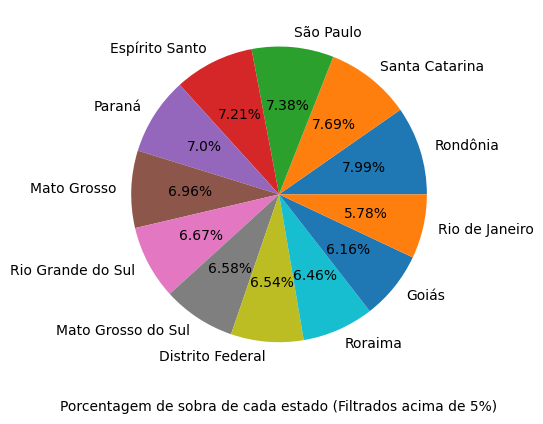

In [3]:
# Mostra uma tabela de todos os estados que ultrapassaram os 5% de sobra
display(df_estados.sort_values(by=['Percentual de Sobra'], ascending=False))

# Função que retorna os valores corretos de cada estado
index = 0
def custom_values(x):
    global index
    formatted_value = f'{list(percent_estados.values())[index]}%'
    index += 1

    return formatted_value

# Variaveis responsaveis pela construção de graficos
fig, ax = plt.subplots()

# Cria um grafico de pizza/torta utilizando os estados e seus respectivos percentuais de sobra
ax.pie(
    percent_estados.values(),
    labels=percent_estados.keys(),
    autopct=custom_values,
)

# Adiciona um rótulo descrevendo o grafico
plt.xlabel('Porcentagem de sobra de cada estado (Filtrados acima de 5%)', labelpad=15)

# Criando pasta que ira armazenar os graficos criados pelo script
if not os.path.exists("./graphs"): 
    os.mkdir('graphs')

# Salva o grafico como um PNG, dentro da pasta './graphs'
plt.savefig('./graphs/porcentagem_sobra.png')